# Emotional Dialogues Project

Participants: 
- Rachel Kim
- Igor Katselenbogen
- Filippo Manzardo

Describe what we do...

## What is given?

Dataset: The dataset consist of short conversation passages (of 3 to 5 utterances each), each labelled with an emotion.
- Task: The original task on this dataset was to generate responses in the dialogue that respect the target emotion, but the dataset could also be used for sentiment analysis: i.e. to identify the emotion associated with each utterance in the dialogue.
- Hints and suggestions: You could apply various classifiers for the sentiment analysis task including Transformer based models like BERT. Does knowing the previous (or subsequent) utterance improve the classifier performance? Note also that we will demonstrate text generation techniques in the latter practical sessions of the course.


## The task

The aim of the assignment is to apply the techniques you have learnt in class to analyse one of the text datasets described below. The exact tasks performed may depend on the dataset chosen, but we would expect to see some of the following:
### 1. Preliminary analysis:
Briefly describe the dataset:
- what type of documents does it contain?
- how many documents are there?
- calculate and visualise some simple statistics for the collection, e.g. the average document
length, the average vocabulary size, etc.
Play around with documents, using some of the code from the early parts of the course. You could, for example:
- cluster the documents and visualise the clusters to see what types of groups are present (or whether the known classes can be found);
- index the documents so that you can perform keyword search over them;
- train a Word2Vec embedding on the data and investigate the properties of the resulting
embedding.
   
### 2. Training models:
Each of the datasets comes with a particular task that you need to perform, so:
- train a model to perform that task (by fine-tuning models on the training data);
- test pre-trained models on the task (if they already exist); and
- evaluate different models and compare their performance.
HINT: as a minimum here we would expect to see a linear classifier trained on the data (if an appropriate for the task) and compare it with deep learning model, such as BERT.

### 3. Possible extensions:
Depending on the dataset chosen there will be many additional investigations you can perform. For instance, oftentimes we can improve performance of a model on a particular task by simply including additional data that is related to the task in its training set. So see if you can find other data that helps with the task that you chose. Moreover, there are many NLP challenges out there, so if you can’t find more data for the task you’re working on, look for another interesting challenge to work on.

### Reasonings between the team

Overall we should:
- setup everything, so we can actually see the data ⚙️
- provide analysis of the data
- clean the data
- try to train the model for the answer generation
- try to also train the classifier (which sentiment does it contains)
- try to find some insights and maybe propose what could we do with the data

## Prepare environment

In [4]:
!pip install pydrive
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
import os
from google.colab import drive
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data prepration

As usual we start from data prepration.

Before starting We need to connect the Google Drive storage to the notebook.

In [1]:
# Mount the Google drive storage
drive.mount('/content/drive')

# Move to the directory with the notebooks and the data set
# (note, you may need to change this path according to your directory structure)
os.chdir('/content/drive/MyDrive/Colab Notebooks/NLP')

# Check the currect working directory
os.getcwd()

Mounted at /content/drive


'/content/drive/MyDrive/Colab Notebooks/NLP'

##  Data loading
First thing we need to do is load a set of documents that we can cluster.

TODO: Write about the dataset

In [16]:
with open('emotional_dialogues/EDOS_1M.csv') as f:
  df = pd.read_csv(f)

## Data analysis

Let's go over some basic information about the data and analize it a bit together. 

In [20]:
df.head()

,dialogue_id,turn,uttr,eb+_emot,label_confidence
0,97,1,You moron ! What fool washes diapers by the we...,angry,0.437522
1,97,2,You useless fool !,furious,0.731564
2,99,1,How dare you sleep !,furious,0.605636
3,99,2,Up ! Go and clean the house .,prepared,0.650449
4,100,1,Clean the kitchen .,prepared,0.742187


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2829426 entries, 0 to 2829425
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   dialogue_id       int64  
 1   turn              int64  
 2   uttr              object 
 3   eb+_emot          object 
 4   label_confidence  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 107.9+ MB


First thing we could say is that we have **2 829 426** entries in our dataset and **5** columns. 

Let's go over the columns and see a bit closer what each of them mean:

*   dialogue_id — an identificator of the dialogue. It would be helpful for us, 
*   turn —
*   uttr — 
*   label_confidence —
*   eb+_emot —

The target column for our purposes is eb+_emot. Let's see a bit more about the values in there:

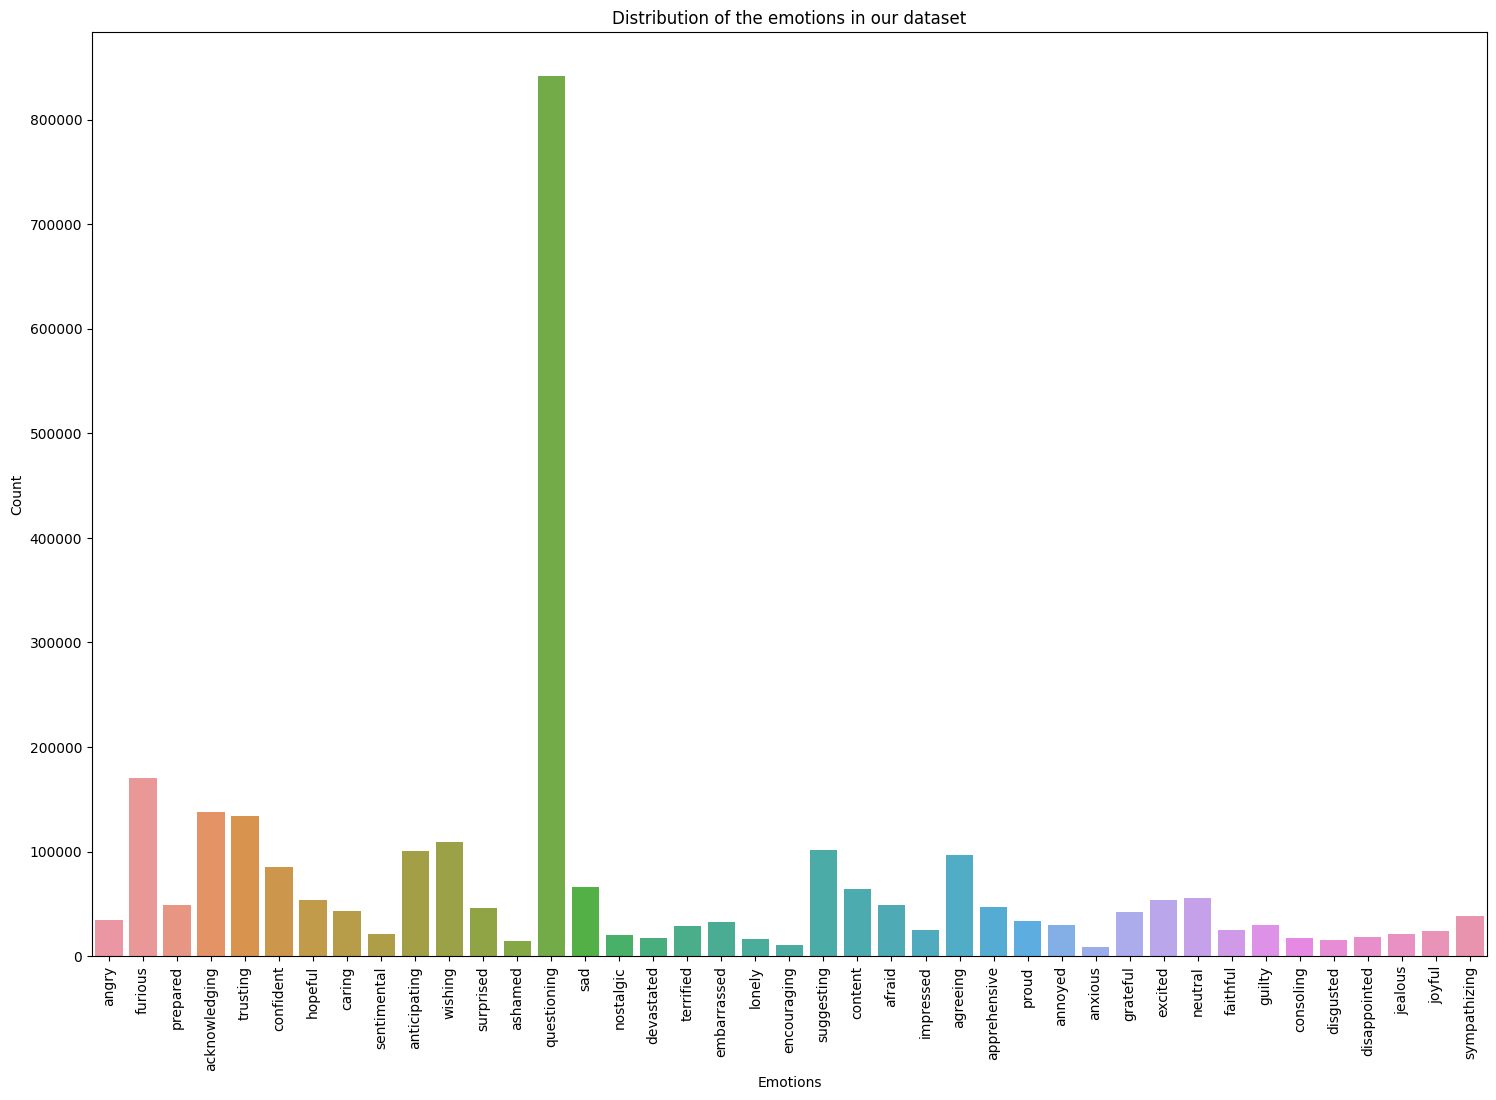

In [35]:
plt.figure(figsize=(18, 12))
sns.countplot(data=df, x='eb+_emot')

plt.title('Distribution of the emotions in our dataset')
plt.xlabel('Emotions')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.show()

We can see that the emotions aren't distributed proportionally. There is clear disbalance: most of the entries have questioning emotions. That is normal in real datasets, but it just simply means that we need to account it in our work.